In [ ]:
!pip install dython

# **Predict Customer Personality to Boost Marketing Campaign**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
import calendar
import matplotlib.dates as mdates
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')



---


---




# Data Exploration



---



---




In [ ]:
rawdf = pd.read_csv('https://drive.google.com/uc?export=download&id=1WY7_EYEtJ2-ZfTTTnOGAZf4oKMzGsJgc', low_memory=False)
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
rawdf.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
990,990,8545,1954,S1,Cerai,85683000.0,0,0,21-03-2014,6,...,1,0,1,1,1,1,0,3,11,1
1514,1514,3865,1977,D3,Bertunangan,20981000.0,0,0,30-04-2013,14,...,8,0,0,0,0,0,0,3,11,1
972,972,10995,1988,D3,Menikah,15716000.0,1,0,12-11-2012,8,...,8,0,0,0,0,0,1,3,11,0
1555,1555,7791,1967,S2,Menikah,37054000.0,1,1,15-09-2013,89,...,7,0,0,0,0,0,0,3,11,0
1187,1187,9855,1952,S3,Lajang,62000000.0,0,1,25-08-2013,25,...,4,0,0,0,1,0,0,3,11,0


| Feature Name | Description |
| --- | --- |
***CUSTOMERS ATTRIBUTES***
|**Unnamed : 0** | Index number |
|**ID** | Customer's unique identifier |
|**Year_Birth** | Customer's birth year|  
|**Education** |Customer's education level |
|**Marital_Status** | Customer's marital status|
|**Income** | Customer's yearly household income |
|**Kidhome**| Number of children in customer's household |
|**Teenhome** | Number of teenagers in customer's household  |
|**Dt_Customer** |Date of customer's enrollment with the company  |
|**Recency** | Number of days since customer's last purchase |
|**Complain** | 1 if the customer complained in the last 2 years, 0 otherwise |  
***PRODUCTS ATTRIBUTES***
|**MntCoke** | Amount spent on coke in last 2 years |
|**MntFruits** | Amount spent on fruits in last 2 years |
|**MntMeatProducts** | Amount spent on meat in last 2 years |  
|**MntFishProducts** | Amount spent on fish in last 2 years |
|**MntSweetProducts** | Amount spent on sweets in last 2 years|
|**MntGoldProds** | Amount spent on gold in last 2 years |
***PROMOTION ATTRIBUTES***
|**NumDealsPurchases** |Number of purchases made with a discount|
|**AcceptedCmp1** |1 if customer accepted the offer in the 1st campaign, 0 otherwise|
|**AcceptedCmp2** |1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
|**AcceptedCmp3** |1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
|**AcceptedCmp4** |1 if customer accepted the offer in the 4th campaign, 0 otherwise|
|**AcceptedCmp5** |1 if customer accepted the offer in the 5th campaign, 0 otherwise|
|**Response** |1 if customer accepted the offer in the last campaign, 0 otherwise|
***PLACE ATTRIBUTES***
|**NumWebPurchases** |Number of purchases made through the company’s website|  
|**NumCatalogPurchases** |Number of purchases made using a catalogue|
|**NumStorePurchases** |Number of purchases made directly in stores|  
|**NumWebVisitsMonth** |Number of visits to company’s website in the last month|
|**Z_CostContact** | Cost to contact a customer |
|**Z_Revenue** |Revenue after client accepting campaign|


In [ ]:
# Check duplicated rows
rawdf.duplicated().sum()

0

Hasil :
1. Hanya ada 1 kolom dengan null value yaitu kolom Income (24 null values)  
2. Tipe data untuk kolom Dt_Customers perlu diubah ke datetime  
3. Tidak ada data duplikat

In [ ]:
# Descriptive statistic

num_cols = rawdf.select_dtypes(exclude='object').columns.tolist()
cat_cols = rawdf.select_dtypes(include='object').columns.tolist()

pd.set_option('display.float_format', lambda x: '%.3f' % x)
rawdf[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.000,1119.500,646.777,0.000,559.750,1119.500,1679.250,2239.000
ID,2240.000,5592.160,3246.662,0.000,2828.250,5458.500,8427.750,11191.000
Year_Birth,2240.000,1968.806,11.984,1893.000,1959.000,1970.000,1977.000,1996.000
Income,2216.000,52247251.354,25173076.661,1730000.000,35303000.000,51381500.000,68522000.000,666666000.000
Kidhome,2240.000,0.444,0.538,0.000,0.000,0.000,1.000,2.000
Teenhome,2240.000,0.506,0.545,0.000,0.000,0.000,1.000,2.000
Recency,2240.000,49.109,28.962,0.000,24.000,49.000,74.000,99.000
MntCoke,2240.000,303935.714,336597.393,0.000,23750.000,173500.000,504250.000,1493000.000
MntFruits,2240.000,26302.232,39773.434,0.000,1000.000,8000.000,33000.000,199000.000
MntMeatProducts,2240.000,166950.000,225715.373,0.000,16000.000,67000.000,232000.000,1725000.000


In [ ]:
rawdf[cat_cols].describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,6,663
top,S1,Menikah,31-08-2012
freq,1127,864,12


## Feature Extraction

In [ ]:
# Age - we can't use year birth as indicator, so need to be converted to age
rawdf['Age'] = 2023 - rawdf['Year_Birth']
rawdf['Children'] = rawdf['Kidhome'] + rawdf['Teenhome']
rawdf['TotalSpending'] = rawdf.filter(regex='Mnt', axis=1).sum(axis=1)
rawdf['TotalTrx'] = rawdf.filter(regex='Purchases', axis=1).sum(axis=1)
rawdf['TotalAccCmp'] = rawdf.filter(regex='Cmp', axis=1).sum(axis=1)

In [ ]:
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

rawdf['CVR'] = round(rawdf.apply(lambda x: cvr(x['TotalTrx'],x['NumWebVisitsMonth']), axis=1), 2)
rawdf['CVR'].value_counts()

1.000     123
2.000      63
4.000      47
3.000      46
0.710      43
         ... 
5.830       1
3.220       1
6.600       1
14.500      1
3.380       1
Name: CVR, Length: 178, dtype: int64

In [ ]:
rawdf.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,TotalSpending,TotalTrx,TotalAccCmp,CVR
652,652,6661,1974,S1,Menikah,67445000.000,0,1,12-08-2012,63,...,0,3,11,0,49,1,1174000,32,0,5.330
1578,1578,8175,1992,S1,Menikah,34935000.000,0,0,21-06-2013,71,...,0,3,11,0,31,0,137000,8,0,1.140
1295,1295,3551,1954,S2,Bertunangan,60033000.000,0,1,29-03-2014,28,...,0,3,11,0,69,1,198000,10,0,5.000




---



---



# Exploratory Data Analysis



---



---



In [ ]:
rawdf['Education'].unique()

array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

In [ ]:
rawdf['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

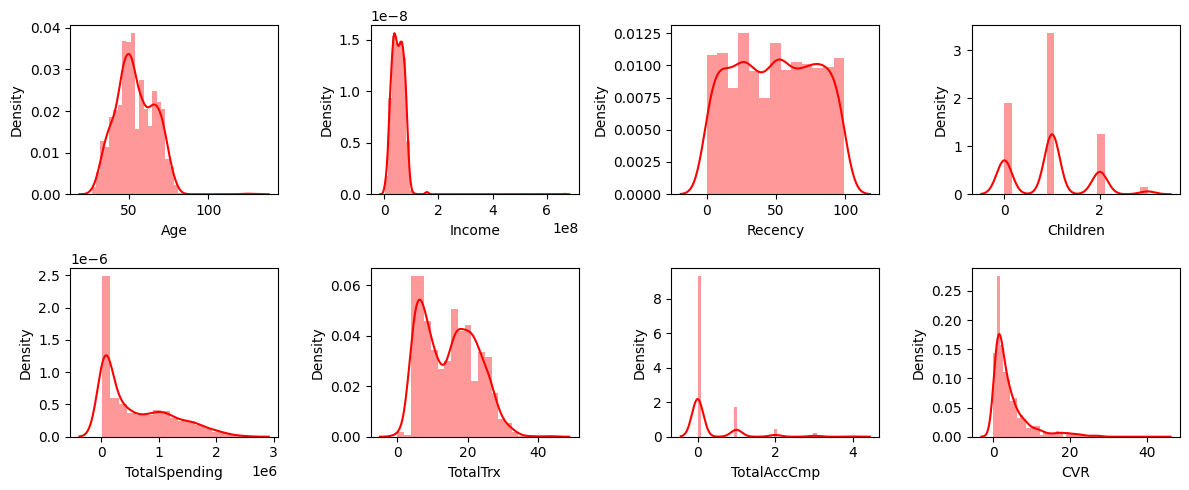

In [ ]:
# Graph of Data Distribution
num = ['Age','Income', 'Recency', 'Children', 'TotalSpending', 'TotalTrx', 'TotalAccCmp', 'CVR']

plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.subplot(2, 4, i+1)
    sns.distplot(rawdf[num[i]], color='red')
    plt.tight_layout()

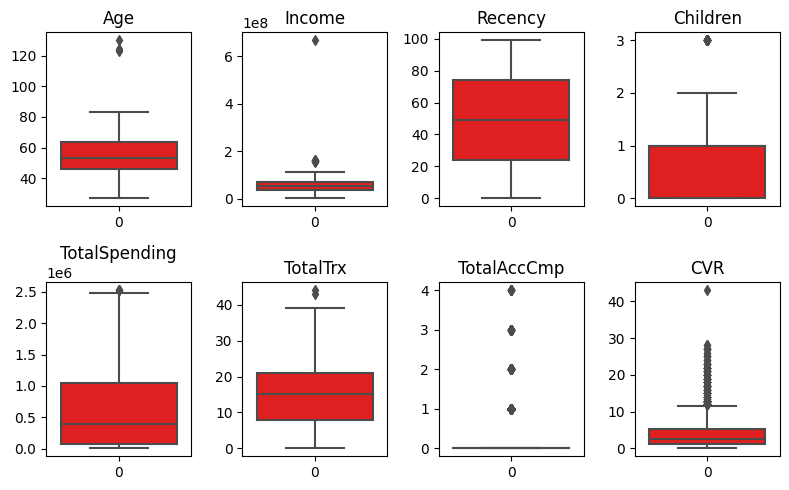

In [ ]:
# Checking Outliers
plt.figure(figsize=(8, 5))
for i in range(0, len(num)):
    plt.subplot(2, 4,  i+1)
    sns.boxplot(rawdf[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

Jika kita lihat outliers untuk `Age` terlihat bahwa data tersebut kurang masuk akal karena sudah berumur lebih dari 80 tahun sehingga sebaiknya baris ini dihapus agar proses clustering terhindar dari outliers. Begitu juga dengan outliers pada kolom `Income` yang bernilai lebih dari 600.000.000. `TotalSpending`, `TotalTrx`, dan `CVR`juga menunjukkan outliers sehingga perlu penanganan lebih lanjut.

In [ ]:
rawdf['Age'].describe()

count   2240.000
mean      54.194
std       11.984
min       27.000
25%       46.000
50%       53.000
75%       64.000
max      130.000
Name: Age, dtype: float64

In [ ]:
rawdf[rawdf['Age'] > 80]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,TotalSpending,TotalTrx,TotalAccCmp,CVR
192,192,7829,1900,D3,Cerai,36640000.000,1,0,26-09-2013,99,...,1,3,11,0,123,1,65000,6,0,1.200
239,239,11004,1893,D3,Lajang,60182000.000,0,1,17-05-2014,23,...,0,3,11,0,130,1,22000,4,0,1.000
339,339,1150,1899,S3,Bertunangan,83532000.000,0,0,26-09-2013,36,...,0,3,11,0,124,0,1853000,15,1,15.000
424,424,6932,1941,S3,Menikah,93027000.000,0,0,13-04-2013,77,...,0,3,11,0,82,0,2119000,22,1,11.000
1950,1950,6663,1940,S3,Lajang,51141000.000,0,0,08-07-2013,96,...,0,3,11,0,83,0,157000,9,0,1.800


In [ ]:
# Drop outliers of age
out_age = rawdf[((rawdf.Age > 80))].index
rawdf = rawdf.drop(out_age)

In [ ]:
rawdf['Income'].describe()

count        2211.000
mean     52218628.223
std      25175027.907
min       1730000.000
25%      35221000.000
50%      51373000.000
75%      68487000.000
max     666666000.000
Name: Income, dtype: float64

In [ ]:
# Drop outliers of income
out_income = rawdf[((rawdf.Income > 600000000))].index
rawdf = rawdf.drop(out_income)

In [ ]:
# Checking outliers from Total Transactions
rawdf[rawdf['TotalTrx'] > 40]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,TotalSpending,TotalTrx,TotalAccCmp,CVR
21,21,5376,1979,S1,Menikah,2447000.000,1,0,06-01-2013,42,...,0,3,11,0,44,1,1730000,43,0,43.000
687,687,1501,1982,S3,Menikah,160803000.000,0,0,04-08-2012,21,...,0,3,11,0,41,0,1717000,44,0,0.000


In [ ]:
# Drop outliers of age
out_trx = rawdf[((rawdf.TotalTrx > 40))].index
rawdf = rawdf.drop(out_trx)

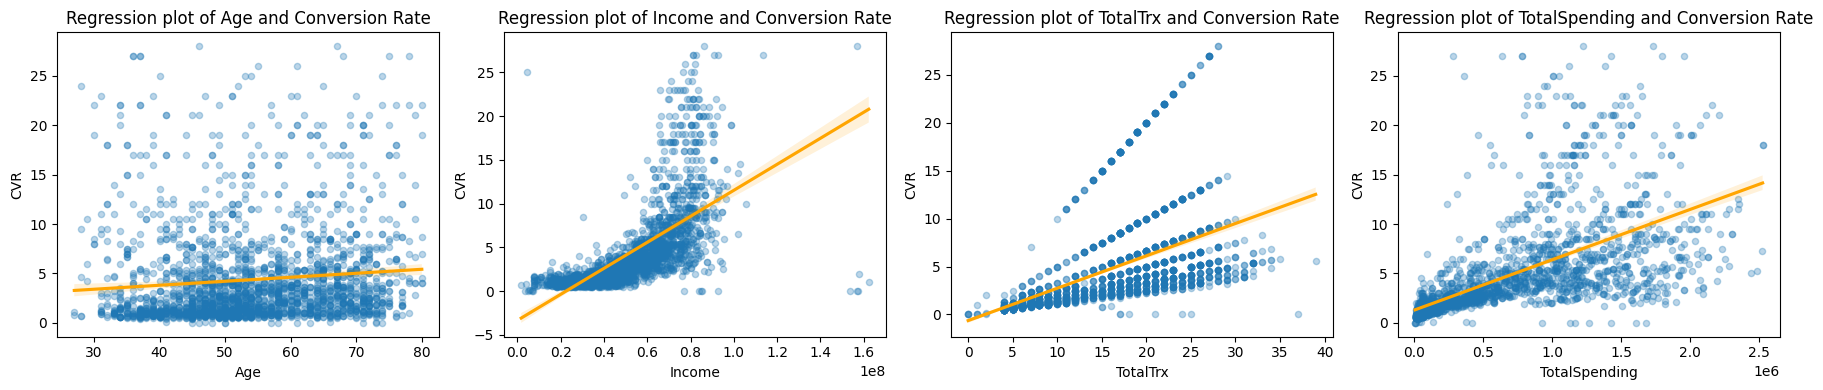

In [ ]:
biv = ['Age', 'Income', 'TotalTrx', 'TotalSpending']
plt.figure(figsize=(18, 4))
for var in range(0, len(biv)):
    plt.subplot(1, 4, var+1)
    sns.regplot(x=rawdf[biv[var]], y='CVR', data=rawdf, scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'orange'}).set(title=f'Regression plot of {biv[var]} and Conversion Rate')
    plt.tight_layout()

## Business Analysis

### 1. CVR Based on Age

In [ ]:
df_plot = rawdf.copy()
df_plot.shape

(2232, 36)

In [ ]:
# Age Grouping

def age_group(x):
    if x <= 30:
        return '20-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    elif x <= 70:
        return '61-70'
    else:
        return '> 70'

df_plot['Age_Group'] = df_plot['Age'].apply(lambda x : age_group(x))

In [ ]:
CVR_age = df_plot.groupby('Age_Group').agg({'ID': 'count','CVR':'mean'}).reset_index().rename(columns = {'ID' : 'Counts'})
CVR_age

,Age_Group,Counts,CVR
0,20-30,15,8.508
1,31-40,286,4.438
2,41-50,617,3.573
3,51-60,620,4.003
4,61-70,465,5.023
5,> 70,229,5.902


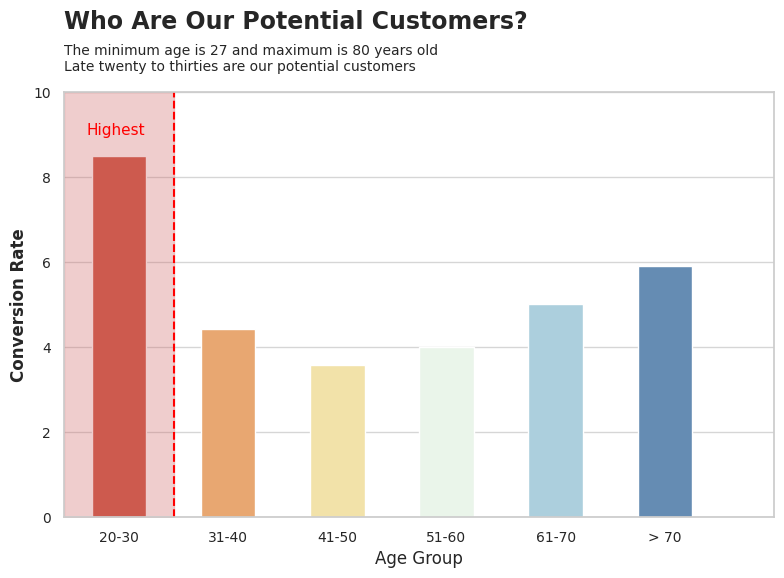

In [ ]:
# Plotting the Age Group

sns.set(style='whitegrid')
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.barplot(x='Age_Group', y = 'CVR', width = 0.5, data=CVR_age, palette='RdYlBu', ax=ax)

ax.set_xlabel('Age Group', fontsize=12, fontweight='medium')
ax.set_ylabel('Conversion Rate', fontsize=12, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.text(s="Who Are Our Potential Customers?",
         x=-0.5, y=11.5, fontsize=17, fontweight='bold')
plt.text(s="The minimum age is 27 and maximum is 80 years old\nLate twenty to thirties are our potential customers",
         x=-0.5, y=10.5, fontsize=10)

plt.xlim(-0.5, 6.0)
plt.ylim(0, 10.0)

plt.axvline(0.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5, 1.3, 1), [[10.00]], color='indianred', alpha=0.3)
plt.text(x=-0.3, y=9.0, s='Highest', fontsize=11, color='red')

plt.tight_layout()
plt.savefig('cvr_by_age.png')

### 2. CVR Based on Income

In [ ]:
# Handling missing value from Income
df_plot['Income'].fillna(df_plot['Income'].median(), inplace=True)

In [ ]:
# Income Grouping

income = np.where(df_plot['Income']>100000000, 110000000, df_plot['Income'])
income_bins = list(np.arange(0, max(income)+10000000, 10000000))
income_labs = ['{}M-{}M'.format(i*10, (i+1)*10) for i in range(10)] + ['>100M']
df_plot['Income_Group'] = pd.cut(income, bins=income_bins, labels=income_labs)

CVR_income = df_plot.groupby('Income_Group').agg({'ID': 'count', 'CVR': 'mean'}).reset_index().rename(columns = {'ID' : 'Counts'})
CVR_income

,Income_Group,Counts,CVR
0,0M-10M,28,1.677
1,10M-20M,98,1.104
2,20M-30M,243,1.087
3,30M-40M,361,1.325
4,40M-50M,328,2.074
5,50M-60M,338,3.605
6,60M-70M,332,5.851
7,70M-80M,291,8.779
8,80M-90M,163,11.599
9,90M-100M,39,12.398


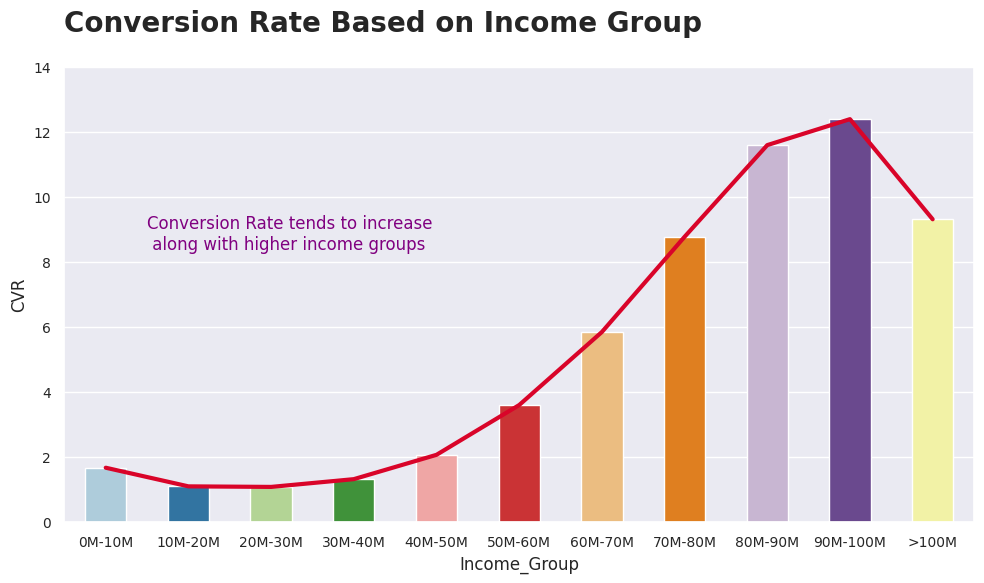

In [ ]:
# Visualize the data
sns.set(style='darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(x=CVR_income.index, y=CVR_income['CVR'], color='#D90429', linewidth=3)
sns.barplot(x='Income_Group', y = 'CVR', width = 0.5, data=CVR_income, palette='Paired', ax=ax)

plt.xlabel('Income_Group')
ax.set_xlabel('Income_Group', fontsize=12, fontweight='medium')
plt.ylabel('CVR')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylim(0, 14)

ax.set_title('Conversion Rate Based on Income Group',
             x=0, y=1.06, loc='left', fontweight='bold', fontsize=20)
plt.text(s="Conversion Rate tends to increase\n along with higher income groups",
         x=0.5, y=8.4, fontsize=12, color = 'purple')

plt.tight_layout()
#plt.savefig('cvr_income.png')
plt.show()

### 3. CVR Based on Total Transactions

In [ ]:
df_plot['TotalTrx'].describe()

count   2232.000
mean      14.846
std        7.634
min        0.000
25%        8.000
50%       15.000
75%       21.000
max       39.000
Name: TotalTrx, dtype: float64

In [ ]:
# Transactions Grouping
def trx_group(x):
    if x <= 10:
        return '0-10 Trx'
    elif x <= 20:
        return '11-20 Trx'
    elif x <= 30:
        return '21-30 Trx'
    else:
        return '>30 Trx'

df_plot['Trx_Group'] = df_plot['TotalTrx'].apply(lambda x : trx_group(x))
CVR_trx = df_plot.groupby('Trx_Group').agg({'ID': 'count', 'CVR': 'mean'}).reset_index().rename(columns = {'ID' : 'Counts'})
CVR_trx

,Trx_Group,Counts,CVR
0,0-10 Trx,829,1.174
1,11-20 Trx,799,5.434
2,21-30 Trx,570,7.509
3,>30 Trx,34,5.148


In [ ]:
# Visualize
fig = px.pie(CVR_trx, values = 'Counts', color = CVR_trx['Trx_Group'], names = CVR_trx['Trx_Group'],
             color_discrete_sequence = ['#BA181B','#FFC300', '#003566', '#FAF3DD'], hole = 0.4)
fig.update_traces(textposition = 'outside', textfont = dict(color = 'dark blue', size = 15), textinfo = 'label+percent', rotation = 10)
fig.add_annotation (text = 'Groups', showarrow = False, font = dict(size = 12, color='dark blue'))
fig.update_layout(title={'text':'Conversion Rate Based on Transactions Group', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

### 4. CVR Based on Total Spending

In [ ]:
df_plot['TotalSpending'].describe()

count      2232.000
mean     604508.513
std      600543.864
min        5000.000
25%       69000.000
50%      396000.000
75%     1043250.000
max     2525000.000
Name: TotalSpending, dtype: float64

In [ ]:
# Total Spending Grouping
def spending_group(x):
    if x <= 500000:
        return '0-0.5M'
    elif x <= 1000000:
        return '0.5M-1M'
    elif x <= 1500000:
        return '1M-1.5M'
    elif x <= 2000000:
        return '1.5M-2M'
    elif x <= 2500000:
        return '2M-2.5M'
    else:
        return '>2.5M'

df_plot['Spending_Group'] = df_plot['TotalSpending'].apply(lambda x : spending_group(x))
CVR_spending = df_plot.groupby('Spending_Group').agg({'ID': 'count', 'CVR': 'mean'}).reset_index().rename(columns = {'ID' : 'Counts'})
CVR_spending = CVR_spending.sort_values('Counts', ascending=False)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
CVR_spending

,Spending_Group,Counts,CVR
0,0-0.5M,1242,1.749
1,0.5M-1M,392,6.188
3,1M-1.5M,356,8.489
2,1.5M-2M,193,8.579
4,2M-2.5M,46,9.820
5,>2.5M,3,14.417


In [ ]:
# Visualize

sns.set(style='white')
fig = px.bar(data_frame=CVR_spending, x='Spending_Group', y= 'CVR',
       color='CVR', color_continuous_scale='RdPu',
       width=800, height=600,
       text_auto=True, title=f'Conversion Rate Based on Spending')

fig.update_layout(plot_bgcolor='white', xaxis_tickangle = 15)
fig.show()



---



---



# Data Cleaning



---



---



In [ ]:
dfcleaned = df_plot.copy()
dfcleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           2232 non-null   int64   
 1   ID                   2232 non-null   int64   
 2   Year_Birth           2232 non-null   int64   
 3   Education            2232 non-null   object  
 4   Marital_Status       2232 non-null   object  
 5   Income               2232 non-null   float64 
 6   Kidhome              2232 non-null   int64   
 7   Teenhome             2232 non-null   int64   
 8   Dt_Customer          2232 non-null   object  
 9   Recency              2232 non-null   int64   
 10  MntCoke              2232 non-null   int64   
 11  MntFruits            2232 non-null   int64   
 12  MntMeatProducts      2232 non-null   int64   
 13  MntFishProducts      2232 non-null   int64   
 14  MntSweetProducts     2232 non-null   int64   
 15  MntGoldProds         

In [ ]:
# Fix the noise
# Convert to datetime data type
dfcleaned['Dt_Customer'] = pd.to_datetime(dfcleaned['Dt_Customer'])

# Simplify the value
dfcleaned['Marital_Status'] = dfcleaned['Marital_Status'].replace(['Janda'], 'Cerai')
dfcleaned['Marital_Status'] = dfcleaned['Marital_Status'].replace(['Duda'], 'Cerai')
dfcleaned['Marital_Status'].value_counts()


Menikah        861
Bertunangan    578
Lajang         482
Cerai          311
Name: Marital_Status, dtype: int64

In [ ]:
# Remove unnecessary features
remove_cols = ['Unnamed: 0','Year_Birth', 'Kidhome', 'Teenhome',
               'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds',
               'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
               'Z_CostContact', 'Z_Revenue', 'Response']
dfcleaned.drop(columns=remove_cols, axis=1, inplace=True)
dfcleaned.shape

(2232, 18)

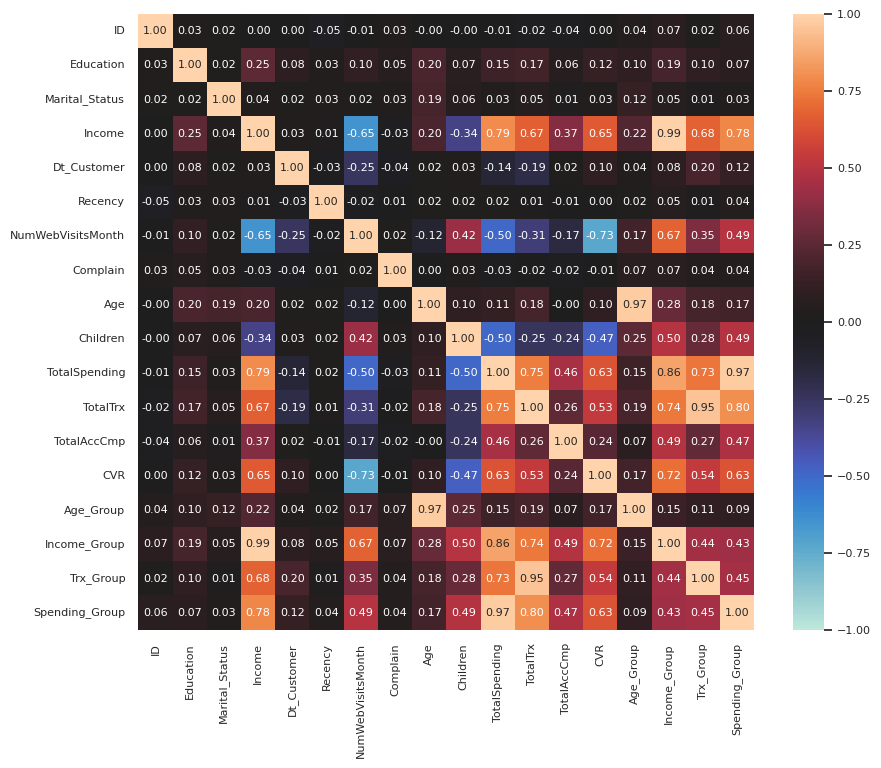

In [ ]:
import matplotlib
from dython.nominal import associations
fig, ax = plt.subplots(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=8)
matplotlib.rc('xtick', labelsize=8)
matplotlib.rc('ytick', labelsize=8)
plt.rcParams.update({'font.size': 8})
associations(dfcleaned, ax=ax, plot=False);

## Data Preparation

In [ ]:
dfpre = dfcleaned.copy()

In [ ]:
dfpre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2232 non-null   int64         
 1   Education          2232 non-null   object        
 2   Marital_Status     2232 non-null   object        
 3   Income             2232 non-null   float64       
 4   Dt_Customer        2232 non-null   datetime64[ns]
 5   Recency            2232 non-null   int64         
 6   NumWebVisitsMonth  2232 non-null   int64         
 7   Complain           2232 non-null   int64         
 8   Age                2232 non-null   int64         
 9   Children           2232 non-null   int64         
 10  TotalSpending      2232 non-null   int64         
 11  TotalTrx           2232 non-null   int64         
 12  TotalAccCmp        2232 non-null   int64         
 13  CVR                2232 non-null   float64       
 14  Age_Grou

In [ ]:
categorical_features = dfpre.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_features:
    print(f'value counts of column {col}')
    print(dfcleaned[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
S1     1125
S3      482
S2      370
D3      201
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        861
Bertunangan    578
Lajang         482
Cerai          311
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column Age_Group
51-60    620
41-50    617
61-70    465
31-40    286
> 70     229
20-30     15
Name: Age_Group, dtype: int64
------------------------------ 

value counts of column Income_Group
30M-40M     361
50M-60M     338
60M-70M     332
40M-50M     328
70M-80M     291
20M-30M     243
80M-90M     163
10M-20M      98
90M-100M     39
0M-10M       28
>100M        11
Name: Income_Group, dtype: int64
------------------------------ 

value counts of column Trx_Group
0-10 Trx     829
11-20 Trx    799
21-30 Trx    570
>30 Trx       34
Name: Trx_Group, dtype: int64
------------------------------ 

value counts of column Spending_Group
0-0.5M  

**LRFM Analysis**
Kolom yang akan dipilih berdasarkan LRFM degan metode reduce dimensionality:

L: Length (`DayAsMember`)  
R: Recency  (`Recency`)  
F: Frequency (`TotalTrx`)  
M: Monetary (`TotalSpending`)  
Additional: (`TotalAccCmp`)

## Feature Encoding and Scaling

In [ ]:
dfpre2 = dfpre.copy()

In [ ]:
# Label Encoder - Education

mapping_education = {'SMA' : 0,
                     'D3' : 1,
                     'S1' : 2,
                     'S2' : 3,
                     'S3' : 4}

dfpre2['Edu_coded'] = dfpre2['Education'].map(mapping_education)

In [ ]:
# One Hot Encoder
for cat in ['Marital_Status', 'Age_Group']:
    onehots = pd.get_dummies(dfpre2[cat], prefix=cat)
    dfpre2 = dfpre2.join(onehots)

In [ ]:
dfselect = dfpre2.copy()

In [ ]:
del_cols = ['ID','Education', 'Marital_Status', 'Dt_Customer', 'Age_Group', 'Income_Group', 'Trx_Group', 'Spending_Group']
dfselect.drop(columns=del_cols, axis=1, inplace=True)

In [ ]:
dfselect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      2232 non-null   float64
 1   Recency                     2232 non-null   int64  
 2   NumWebVisitsMonth           2232 non-null   int64  
 3   Complain                    2232 non-null   int64  
 4   Age                         2232 non-null   int64  
 5   Children                    2232 non-null   int64  
 6   TotalSpending               2232 non-null   int64  
 7   TotalTrx                    2232 non-null   int64  
 8   TotalAccCmp                 2232 non-null   int64  
 9   CVR                         2232 non-null   float64
 10  Edu_coded                   2232 non-null   int64  
 11  Marital_Status_Bertunangan  2232 non-null   uint8  
 12  Marital_Status_Cerai        2232 non-null   uint8  
 13  Marital_Status_Lajang       2232 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler    = StandardScaler()
n = dfselect.select_dtypes(["float64", "int64"]).columns
dfselect[n] = scaler.fit_transform(dfselect[n])

In [ ]:
dfselect.describe()

,Income,Recency,NumWebVisitsMonth,Complain,Age,Children,TotalSpending,TotalTrx,TotalAccCmp,CVR,...,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_20-30,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_61-70,Age_Group_> 70
count,2232.000,2232.000,2232.000,2232.000,2232.000,2232.000,2232.000,2232.000,2232.000,2232.000,...,2232.000,2232.000,2232.000,2232.000,2232.000,2232.000,2232.000,2232.000,2232.000,2232.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,...,0.259,0.139,0.216,0.386,0.007,0.128,0.276,0.278,0.208,0.103
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.438,0.346,0.412,0.487,0.082,0.334,0.447,0.448,0.406,0.304
min,-2.360,-1.696,-2.197,-0.095,-2.320,-1.266,-0.998,-1.945,-0.439,-0.904,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.772,-0.867,-0.959,-0.095,-0.693,-1.266,-0.892,-0.897,-0.439,-0.652,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,-0.025,-0.003,0.279,-0.095,-0.093,0.064,-0.347,0.020,-0.439,-0.365,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.765,0.860,0.691,-0.095,0.849,0.064,0.731,0.806,-0.439,0.197,...,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000
max,5.198,1.724,6.056,10.517,2.220,2.724,3.199,3.165,5.453,4.877,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
dfselect.head(3)

,Income,Recency,NumWebVisitsMonth,Complain,Age,Children,TotalSpending,TotalTrx,TotalAccCmp,CVR,...,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_20-30,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_61-70,Age_Group_> 70
0,0.293,0.308,0.691,-0.095,1.020,-1.266,1.686,1.330,-0.439,-0.167,...,0,0,1,0,0,0,0,0,1,0
1,-0.262,-0.383,-0.134,-0.095,1.277,1.394,-0.962,-1.159,-0.439,-0.656,...,0,0,1,0,0,0,0,0,1,0
2,0.927,-0.798,-0.547,-0.095,0.335,-1.266,0.286,0.806,-0.439,0.180,...,1,0,0,0,0,0,0,1,0,0


## Modeling - Clustering

### Silhouette Score

In [ ]:
dfmodel = dfselect.copy()

In [ ]:
# PCA and Visualization of Clusters

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(dfmodel)
pcs = pca.transform(dfmodel)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,1.426,-0.373
1,-1.581,-1.197
2,1.371,0.243
3,-1.929,1.334
4,0.073,-0.173


Text(0.5, 1.0, 'Visualization of Inertia')

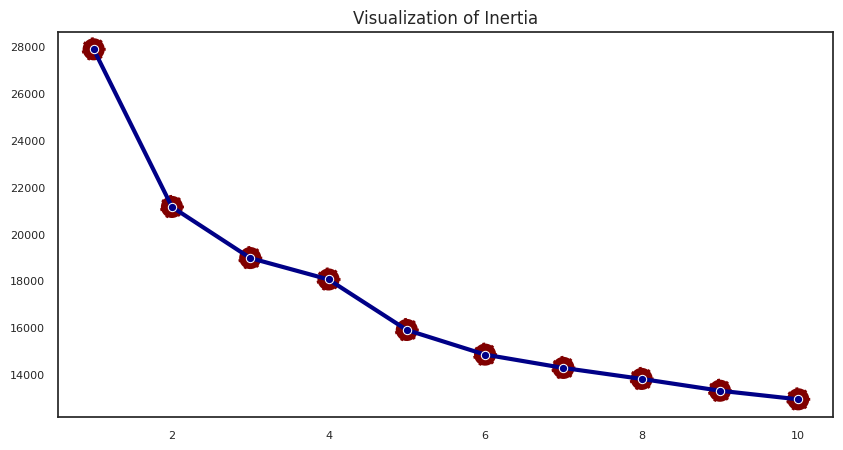

In [ ]:
from sklearn.cluster import KMeans

# Calculates inertia values for 2 to 10 clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(dfmodel)
    inertia.append(kmeans.inertia_)


# Visualize inertia
sns.set_style('white')
plt.figure(figsize= (10, 5))
sns.lineplot(x= range(1, 11), y= inertia, marker='o', color = '#000087', linewidth = 3)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Visualization of Inertia')

In [ ]:
# See the difference in inertia percentage for each additional cluster

((pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100).dropna()

0   24.132
1   10.311
2    4.818
3   11.940
4    6.614
5    3.823
6    3.289
7    3.646
8    2.755
dtype: float64

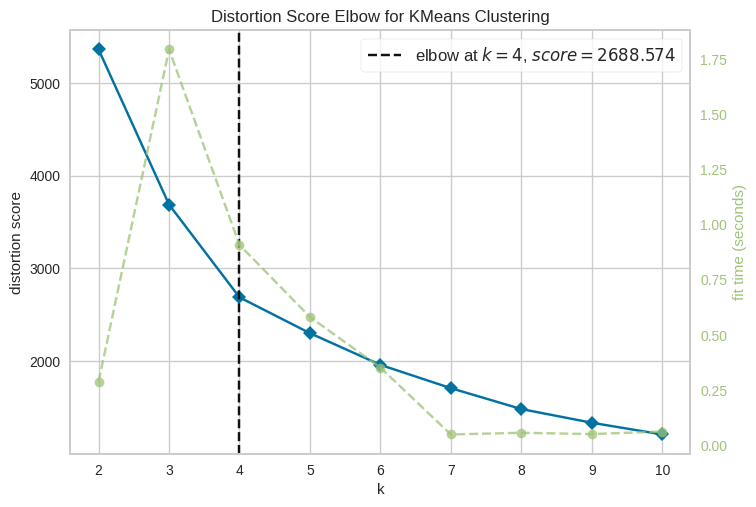

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Visualization with Distortion Score
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_pca)
visualizer.show()

From the Silhouette score results above, it can be seen that the optimal number of clusters is 4 clusters.

### Cluster Evaluation

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_pca)

clusters = kmeans.labels_

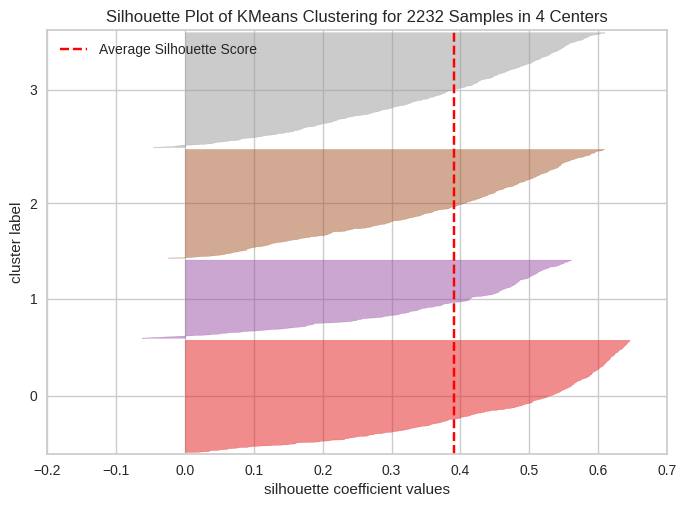

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2232 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Visualize the Clusters Using Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_pca)
visualizer.show()

From the picture above, it can be seen that all clusters have good coefficient values. This means that the model created is very ideal.

In [ ]:
df_pca['Cluster'] = clusters
df_pca.sample(5)

,PC 1,PC 2,Cluster
547,0.034,-0.914,3
1857,1.174,0.290,3
1142,-0.418,-2.071,2
1636,-0.752,0.071,2
488,-0.292,-0.833,2


<Axes: xlabel='PC 1', ylabel='PC 2'>

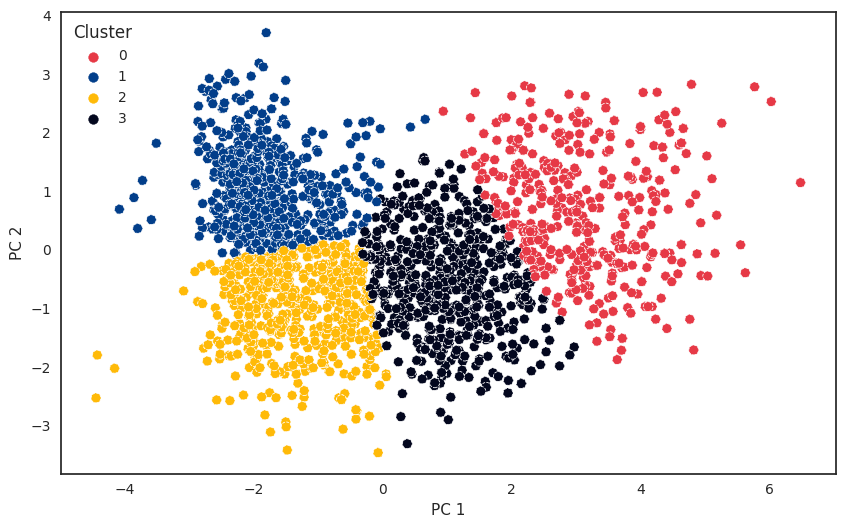

In [ ]:
# Visualization of cluster distribution
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='Cluster',
    linestyle='--',
    data=df_pca,
    marker = 'o',
    palette=['#E63946', '#023E8A', '#FFBA08', '#03071E'],
    s=50,
    ax=ax
)

### Summary

In [ ]:
# Assign cluster to dataset
dfpre.loc[:,'Cluster'] = kmeans.labels_
dfpre.sample(5)

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Age,Children,TotalSpending,TotalTrx,TotalAccCmp,CVR,Age_Group,Income_Group,Trx_Group,Spending_Group,Cluster
1627,252,S3,Cerai,41003000.000,2013-03-17,11,6,0,60,0,601000,17,0,2.830,51-60,40M-50M,11-20 Trx,0.5M-1M,3
285,9974,S1,Menikah,30631000.000,2013-12-07,75,7,0,49,1,70000,7,0,1.000,41-50,30M-40M,0-10 Trx,0-0.5M,1
1490,3478,S3,Menikah,60585000.000,2013-06-24,17,5,0,52,2,736000,30,0,6.000,51-60,60M-70M,21-30 Trx,0.5M-1M,3
1062,1162,S3,Lajang,42000000.000,2013-10-01,23,5,0,36,0,653000,20,0,4.000,31-40,40M-50M,11-20 Trx,0.5M-1M,3
1740,48,S1,Bertunangan,55761000.000,2014-04-24,97,6,0,59,1,184000,10,1,1.670,51-60,50M-60M,0-10 Trx,0-0.5M,2


In [ ]:
features = ['Recency','TotalTrx','TotalSpending', 'TotalAccCmp', 'Cluster', 'CVR']
data_summary = dfpre[features]
round(data_summary.groupby('Cluster').agg(['median']),2).round()

,Recency,TotalTrx,TotalSpending,TotalAccCmp,CVR
,median,median,median,median,median
Cluster,,,,,
0,54.000,21.000,1438000.000,1.000,10.000
1,47.000,7.000,63000.000,0.000,1.000
2,50.000,9.000,107000.000,0.000,2.000
3,49.000,21.000,892000.000,0.000,4.000


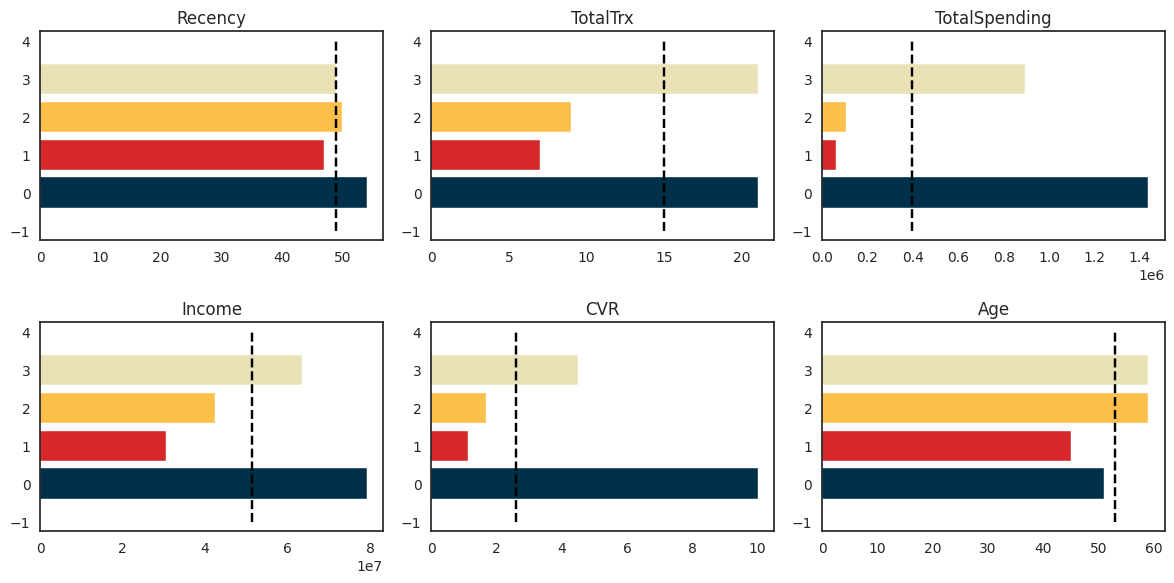

In [ ]:
def dist_list(lst):
    plt.figure(figsize=[12, 6])
    i = 1
    for col in lst:
        ax = plt.subplot(2, 3, i)
        ax.vlines(dfpre[col].median(), ymin=-1, ymax=4, color='black', linestyle='--')
        g = dfpre.groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x, y, color=['#003049', '#D62828', '#FCBF49', '#EAE2B7'])
        plt.title(col)
        i = i + 1

dist_list(['Recency','TotalTrx','TotalSpending', 'Income', 'CVR', 'Age'])
plt.tight_layout()
plt.show()

### Insight

In [ ]:
dfpre['Cluster'].value_counts().to_frame().reset_index().rename(columns={"index": "Cluster", "Cluster": "total_customers"})

,Cluster,total_customers
0,3,615
1,1,611
2,2,588
3,0,418


In [ ]:
cluster_by_age = dfpre.groupby(['Cluster', 'Age_Group'])['CVR'].mean()
cluster_by_age = cluster_by_age.unstack(level=0).fillna(0.0)
cluster_by_age.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_age

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Age_Group,,,,
20-30,11.306,0.812,0.000,0.000
31-40,12.085,1.268,0.000,4.013
41-50,10.114,1.376,1.817,4.687
51-60,11.406,1.239,1.649,4.733
61-70,12.163,1.094,1.750,5.271
> 70,14.578,1.087,1.795,5.347


In [ ]:
cluster_by_trx = dfpre.groupby(['Cluster', 'Trx_Group'])['ID'].count()
cluster_by_age = cluster_by_trx.unstack(level=0).fillna(0.0)
cluster_by_trx.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_trx

Cluster  Trx_Group
0        0-10 Trx       1
         11-20 Trx    206
         21-30 Trx    205
         >30 Trx        6
1        0-10 Trx     475
         11-20 Trx    128
         21-30 Trx      8
2        0-10 Trx     340
         11-20 Trx    207
         21-30 Trx     41
3        0-10 Trx      13
         11-20 Trx    258
         21-30 Trx    316
         >30 Trx       28
Name: ID, dtype: int64

In [ ]:
cluster_by_spending = dfpre.groupby(['Cluster', 'Spending_Group'])['ID'].count()
cluster_by_spending.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_spending

Cluster  Spending_Group
0        0-0.5M              2
         0.5M-1M            61
         1.5M-2M           139
         1M-1.5M           170
         2M-2.5M            43
         >2.5M               3
1        0-0.5M            591
         0.5M-1M            19
         1.5M-2M             1
2        0-0.5M            550
         0.5M-1M            36
         1M-1.5M             2
3        0-0.5M             99
         0.5M-1M           276
         1.5M-2M            53
         1M-1.5M           184
         2M-2.5M             3
Name: ID, dtype: int64